# Датасет
Возьмем историю цен акций компаниии Apple из первой лабораторной работы

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Apple_Historical_StockPrice2.csv')
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-03-28,26.500000,26.547501,26.264999,26.297501,24.459534,77645600
1,2016-03-29,26.222500,26.947500,26.219999,26.920000,25.038527,124760400
2,2016-03-30,27.162500,27.605000,27.150000,27.389999,25.475679,182404400
3,2016-03-31,27.430000,27.475000,27.219999,27.247499,25.343138,103553600
4,2016-04-01,27.195000,27.500000,27.049999,27.497499,25.575666,103496000
5,2016-04-04,27.605000,28.047501,27.567499,27.780001,25.838421,149424800
6,2016-04-05,27.377501,27.682501,27.355000,27.452499,25.533810,106314800
7,2016-04-06,27.557501,27.745001,27.299999,27.740000,25.801216,105616400
8,2016-04-07,27.487499,27.605000,27.030001,27.135000,25.238501,127207600
9,2016-04-08,27.227501,27.442499,27.042500,27.165001,25.266407,94326800


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1260 non-null   object 
 1   Open       1260 non-null   float64
 2   High       1260 non-null   float64
 3   Low        1260 non-null   float64
 4   Close      1260 non-null   float64
 5   Adj Close  1260 non-null   float64
 6   Volume     1260 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1.260000e+03
mean,56.476635,57.098048,55.860792,56.506099,55.358836,1.300474e+08
std,29.961638,30.397301,29.417572,29.916321,30.393892,5.867030e+07
min,22.500000,22.917500,22.367500,22.584999,21.134403,4.544800e+07
25%,37.451875,37.845625,37.139377,37.518126,35.840332,9.116405e+07
50%,46.306250,46.798750,45.942501,46.370001,44.998276,1.138023e+08
75%,66.016253,66.891874,65.626249,66.459377,65.805641,1.505391e+08
max,143.600006,145.089996,141.369995,143.160004,142.946396,4.584084e+08


# Предобработка
Сконвертируем дату

In [5]:
df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%d")

df.set_index(['Date'])
df.sort_index(inplace=True)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-03-28,26.5000,26.547501,26.264999,26.297501,24.459534,77645600
1,2016-03-29,26.2225,26.947500,26.219999,26.920000,25.038527,124760400
2,2016-03-30,27.1625,27.605000,27.150000,27.389999,25.475679,182404400
3,2016-03-31,27.4300,27.475000,27.219999,27.247499,25.343138,103553600
4,2016-04-01,27.1950,27.500000,27.049999,27.497499,25.575666,103496000


Добавим колонки номера месяца и недели

In [6]:
df['Year'] = df['Date'].map(lambda ts: ts.year)
df['Month'] = df['Date'].map(lambda ts: ts.month)
df['Week'] = df['Date'].map(lambda ts: ts.week)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Week
0,2016-03-28,26.5000,26.547501,26.264999,26.297501,24.459534,77645600,2016,3,13
1,2016-03-29,26.2225,26.947500,26.219999,26.920000,25.038527,124760400,2016,3,13
2,2016-03-30,27.1625,27.605000,27.150000,27.389999,25.475679,182404400,2016,3,13
3,2016-03-31,27.4300,27.475000,27.219999,27.247499,25.343138,103553600,2016,3,13
4,2016-04-01,27.1950,27.500000,27.049999,27.497499,25.575666,103496000,2016,4,13


Сгруппируем по году и месяцу/недели так, взяв среднее по колонке `High`

In [7]:
df_week = df.groupby(['Year', 'Week']).agg({'High': 'mean'})
df_month = df.groupby(['Year', 'Month']).agg({'High': 'mean'})

In [8]:
df_month.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 61 entries, (2016, 3) to (2021, 3)
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   High    61 non-null     float64
dtypes: float64(1)
memory usage: 861.0 bytes


In [9]:
df_week.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 261 entries, (2016, 13) to (2021, 12)
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   High    261 non-null    float64
dtypes: float64(1)
memory usage: 3.1 KB


Будем работать с данными, сгруппированными по неделям, т.к. данных по месяцам получается слишком мало

In [10]:
df = df_week
df.head()

High
Year Week         
2016 13    27.2150
     14    27.7045
     15    27.9070
     16    26.9225
     17    25.1130

In [11]:
df.describe()

,High
count,261.000000
mean,57.192955
std,30.463643
min,23.268000
25%,38.221500
50%,46.862500
75%,66.848751
max,142.484003


Посмотрим на сырые данные

In [12]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 7)

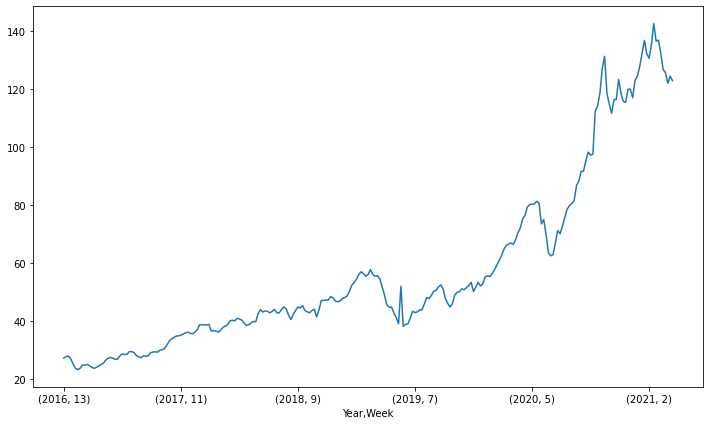

In [13]:
df_week['High'].plot()
plt.show()

Посмотрим на графики тренда, сезонности и ошибки

In [14]:
import statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

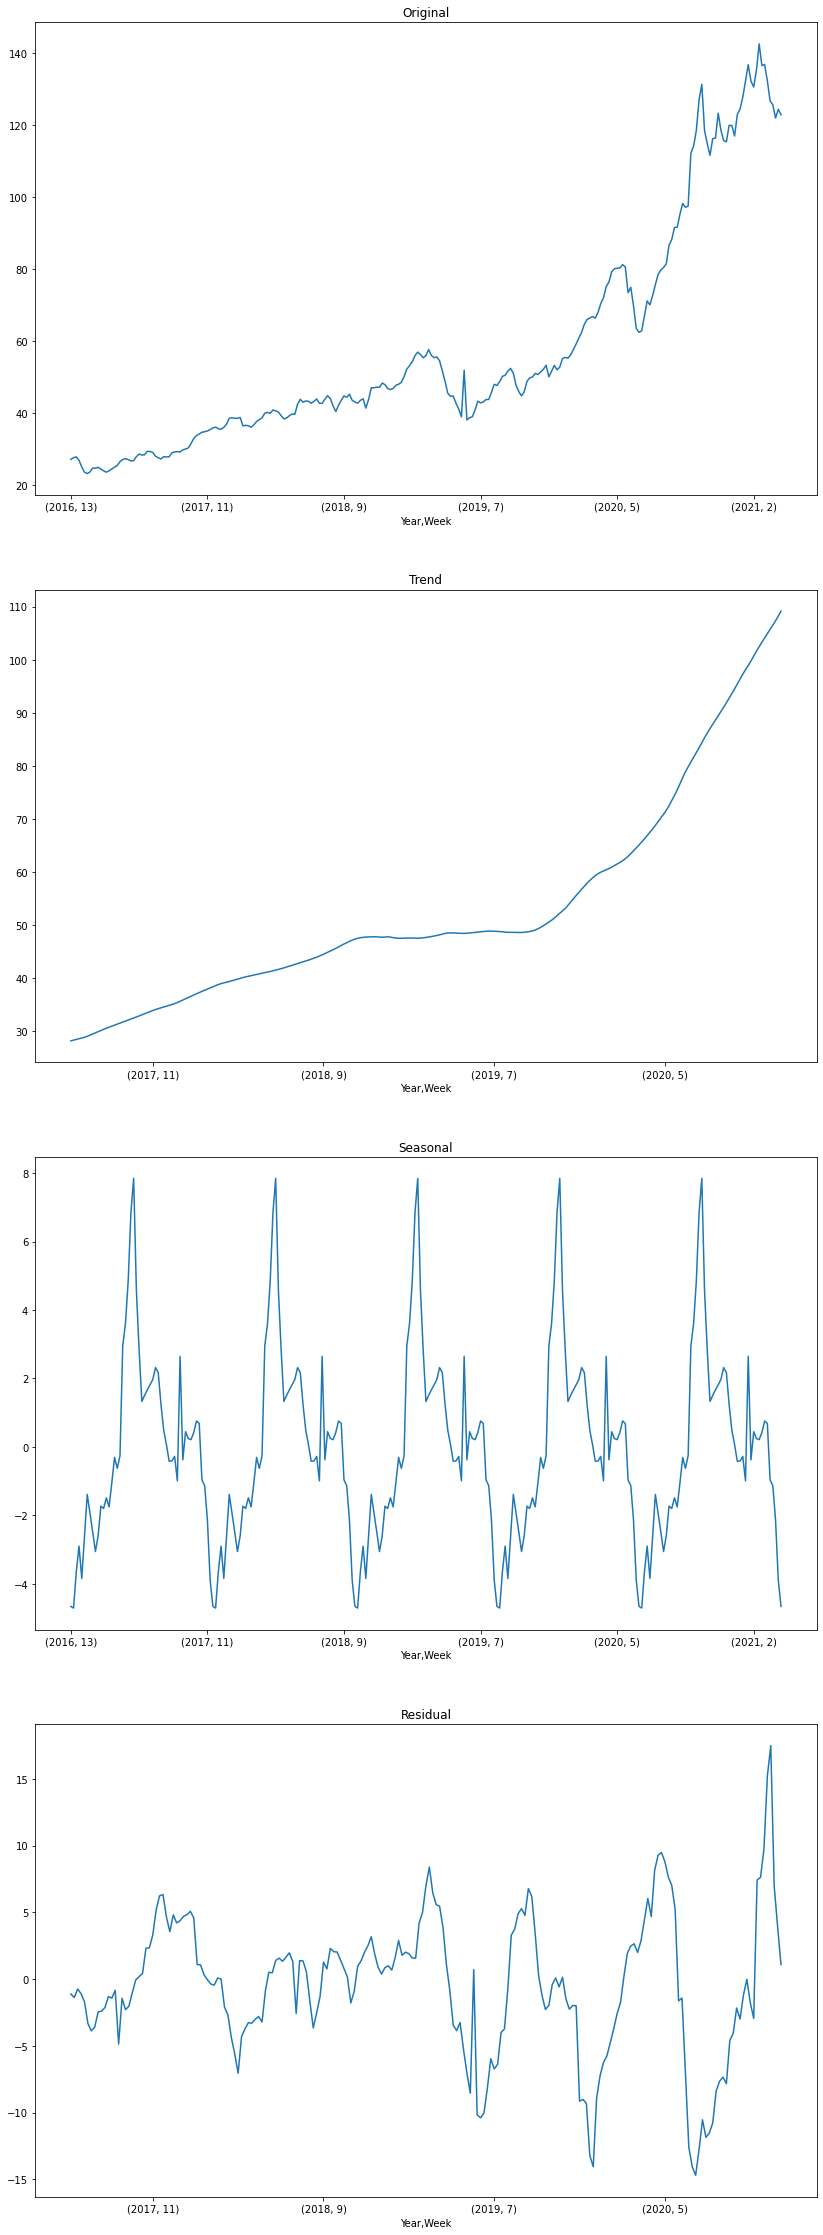

In [15]:
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(14, 40))
decompose = seasonal_decompose(df[['High']], period=52)

ax[0].set_title('Original')
ax[1].set_title('Trend')
ax[2].set_title('Seasonal')
ax[3].set_title('Residual')

decompose.observed.plot(ax=ax[0])
decompose.trend.plot(ax=ax[1])
decompose.seasonal.plot(ax=ax[2])
decompose.resid.plot(ax=ax[3])
plt.show()

Можно заметить, что в наших данных есть тренд и сезонность, а так же увеличение ошибки начиниая с 2020 года. Это значит, что нашряд не стационарен.

Посмотрим на граффик автокорелляции:

In [16]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

In [17]:
acf(df['High'], nlags=20, fft=False)

array([1.        , 0.98539139, 0.97003038, 0.95493847, 0.93839083,
       0.9204516 , 0.90143737, 0.88079814, 0.85960255, 0.83667039,
       0.81632191, 0.79670405, 0.77637635, 0.75553962, 0.73606203,
       0.71778223, 0.70063606, 0.68374029, 0.66712317, 0.64956096,
       0.6327742 ])

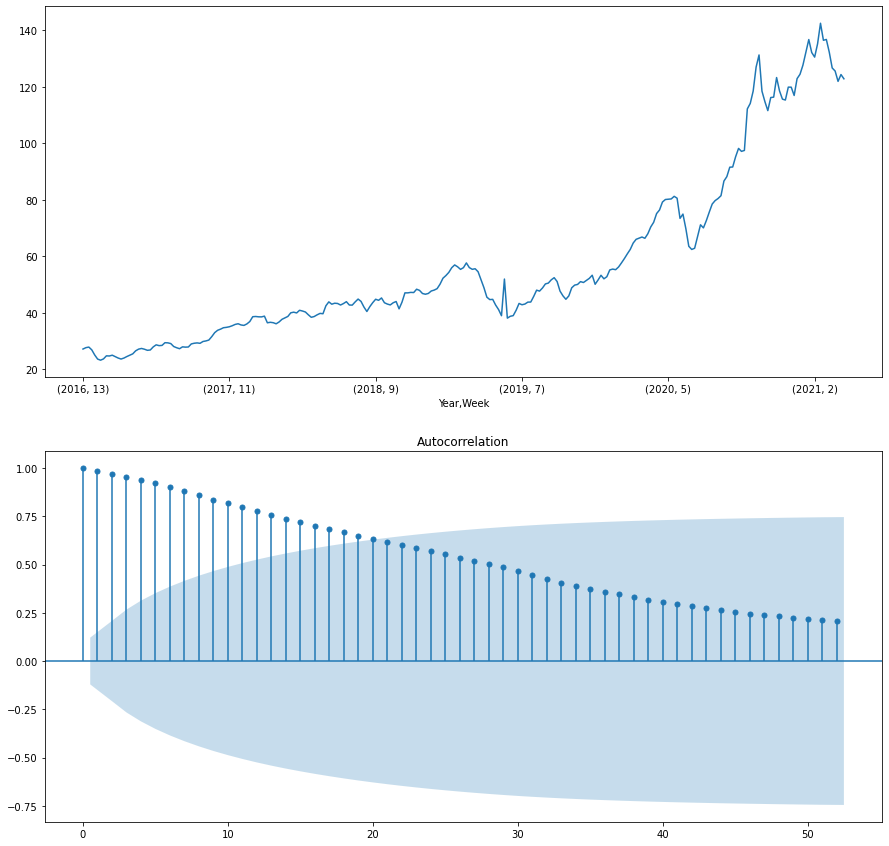

In [18]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))
df['High'].plot(ax=ax[0])
plot_acf(df['High'], lags=52, ax=ax[1])
plt.show()

In [19]:
from statsmodels.tsa.stattools import adfuller

In [20]:
adfuller(df['High'])[1]

0.9882655943555569

Попробуем привести ряд к стационарному. Продифференцируем его

In [21]:
df['HighDiff'] = df['High'].diff()
df.head()

High  HighDiff
Year Week                   
2016 13    27.2150       NaN
     14    27.7045    0.4895
     15    27.9070    0.2025
     16    26.9225   -0.9845
     17    25.1130   -1.8095

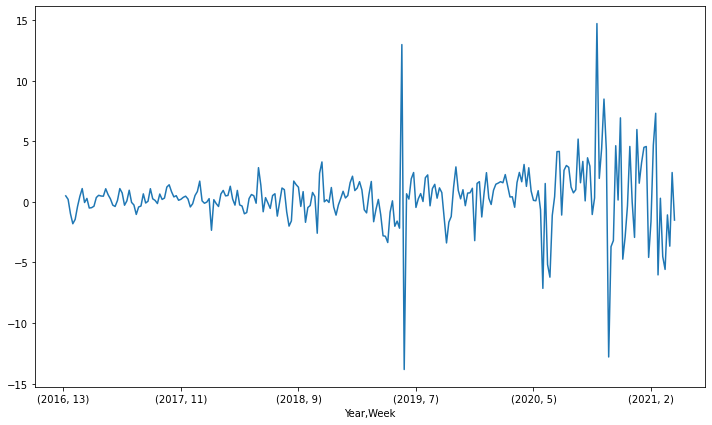

In [22]:
df['HighDiff'].plot()
plt.show()

In [23]:
adfuller(df['HighDiff'][1:])[1]

2.577443410294357e-28

Заметим, что после 2020 дисперсия увеличилась, значит ряд все еще не стационарный. Теперь опробуем прологарифмировать ряд перед дифференцированием

In [24]:
import numpy as np

In [25]:
df['HighLog'] = np.log(df['High'])
df['HighLogDiff'] = df['HighLog'].diff()
df.head()

High  HighDiff   HighLog  HighLogDiff
Year Week                                          
2016 13    27.2150       NaN  3.303768          NaN
     14    27.7045    0.4895  3.321595     0.017827
     15    27.9070    0.2025  3.328878     0.007283
     16    26.9225   -0.9845  3.292962    -0.035915
     17    25.1130   -1.8095  3.223386    -0.069577

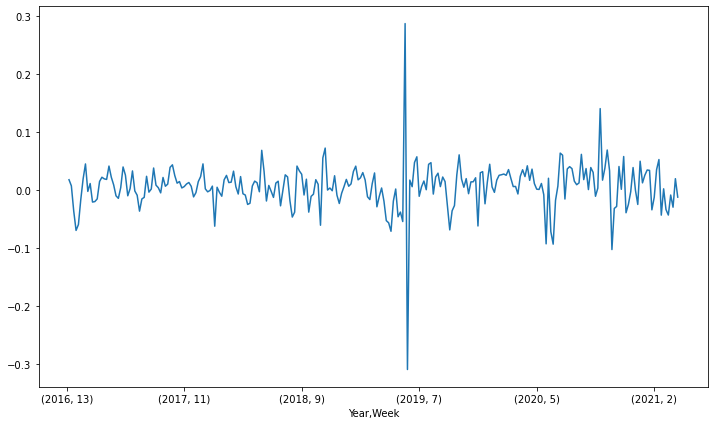

In [26]:
df['HighLogDiff'].plot()
plt.show()

In [27]:
adfuller(df['HighLogDiff'][1:])[1]

4.780420575292855e-30

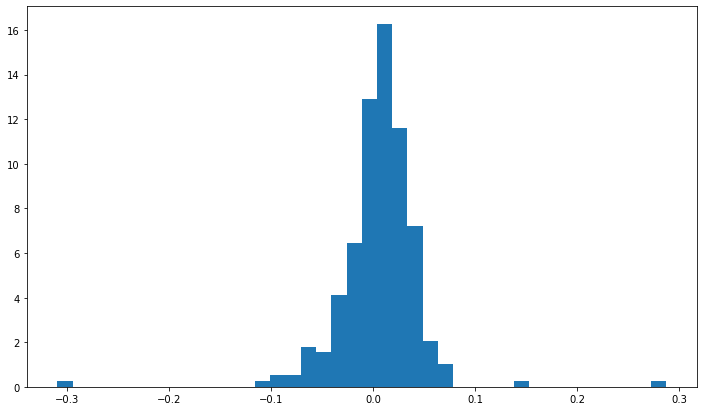

In [28]:
plt.hist(df['HighLogDiff'], density=True, bins=40)
plt.show()

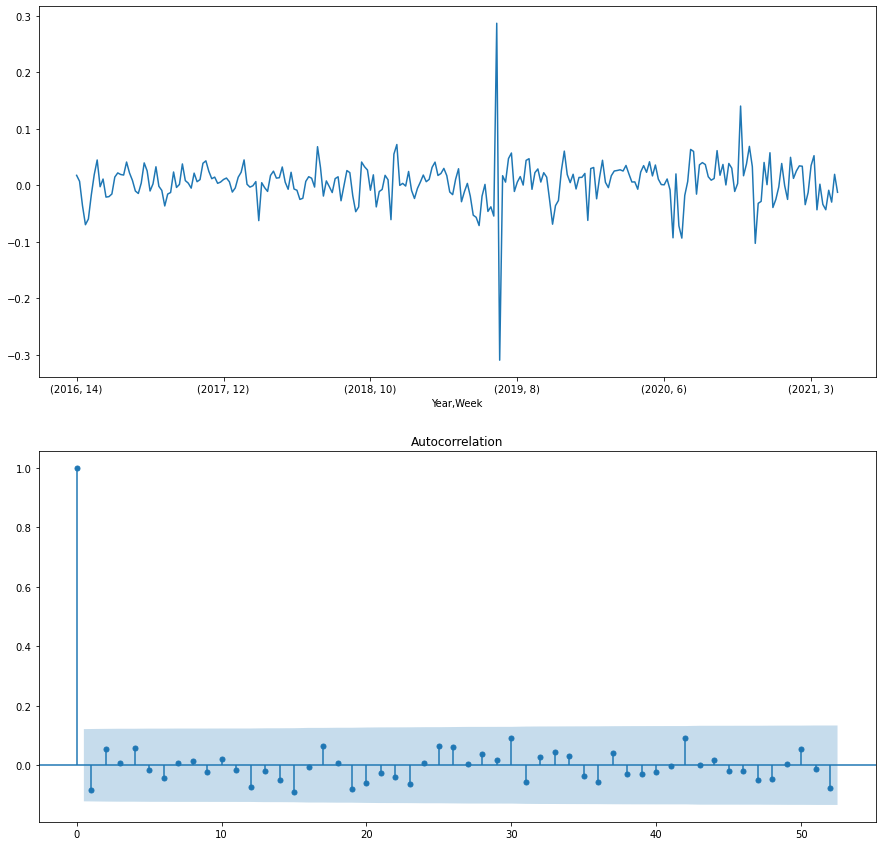

In [29]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))
df['HighLogDiff'][1:].plot(ax=ax[0])
plot_acf(df['HighLogDiff'][1:], lags=52, ax=ax[1])
plt.show()

Теперь ряд больше похож на стационарный

# Модель

In [30]:
sarima_df = df.copy()
sarima_df = sarima_df.drop(['High', "HighDiff", 'HighLogDiff'], axis=1)
sarima_df.head()

HighLog
Year Week          
2016 13    3.303768
     14    3.321595
     15    3.328878
     16    3.292962
     17    3.223386

In [31]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [32]:
X = sarima_df.to_numpy()
y = np.squeeze(sarima_df.to_numpy())
_, _, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [33]:
d = 1
D = 1

q = 1
Q = 1

p = 1
P = 1

s = 28

man_model = sm.tsa.statespace.SARIMAX(
    y_train,
    order=(p, d, q),
    seasonal_order=(P, D, Q, s)
).fit(disp=-1)

In [34]:
d = 1
D = 1

s = 28

qs = range(1, 3)
Qs = range(1, 3)

ps = range(1, 3)
Ps = range(1, 3)

import warnings
warnings.filterwarnings('ignore')

from util import bruteforce_params, MAPE
# bruted_model = bruteforce_params(y_train, s, d, D, qs, Qs, ps, Ps)

In [35]:
model = man_model
# model = bruted_model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  208
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 28)   Log Likelihood                 294.188
Date:                            Wed, 27 Oct 2021   AIC                           -578.376
Time:                                    17:53:21   BIC                           -562.440
Sample:                                         0   HQIC                          -571.914
                                            - 208                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0678      0.521     -0.130      0.896      -1.089       0.954
ma.L1         -0.0873      0.535     -0.163      0.871      -1.137       0.962
ar.S.L28       0.0134      0.146      0.092      0.927      -0.272       0.299
ma.S.L28      -0.9450      0.817     -1.157      0.247      -2.546       0.656
sigma2         0.0017      0.001      1.517      0.129      -0.000       0.004
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2179.34
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.27   Skew:                             0.53
Prob(H) (two-sided):                  0.00   Kurtosis:                        20.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [36]:
y_train.shape, y_test.shape

((208,), (53,))

In [37]:
sarima_df.tail()

HighLog
Year Week          
2021 8     4.841506
     9     4.832943
     10    4.803381
     11    4.823004
     12    4.810801

In [38]:
sarima_df[208:].head()

HighLog
Year Week          
2020 13    4.134358
     14    4.141212
     15    4.204926
     16    4.265092
     17    4.249630

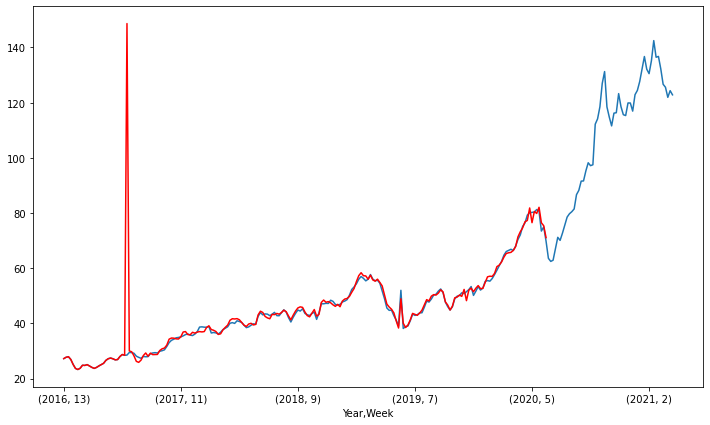

In [39]:
df['Model'] = np.nan
df['Model'][:207] = np.exp(model.fittedvalues)[1:]
df['High'].plot()
df['Model'].plot(c='r')
plt.show()

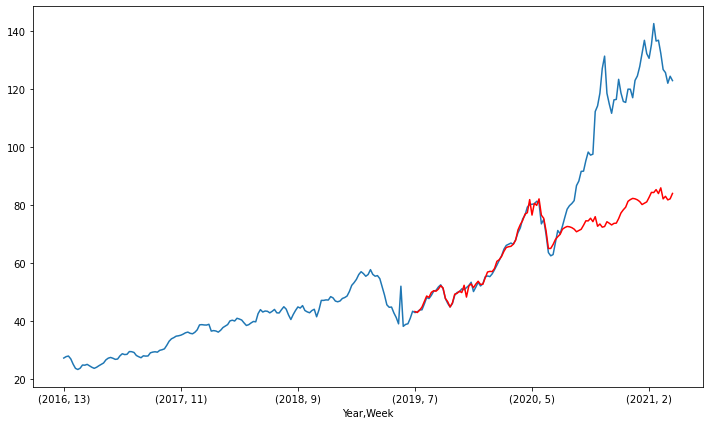

In [40]:
df['Model'] = np.nan
df['Model'][150:] = np.exp(model.predict(start=151, end=261))
df['High'].plot()
df['Model'].plot(c='r')
plt.show()

# Мера
Используем меру MAPE
$$M = \frac{1}{n}\sum_{i = 1}^n\left|\frac{T_i - P_i}{T_i}\right|$$

In [41]:
MAPE(y_test, model.predict(start=209, end=261))

0.07029170006680607